# Read Raw videos

### Description:
EVETAR sensor format: RG10 (RGGB 10 bits)

HDR scene 


In [1]:
import numpy as np
import subprocess
import glob
import skimage.io as imio
import re
from skimage.color import rgb2gray
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from utils import read_raw, print_stat

In [3]:
n_frames = 32
rIm=read_raw("hdr_frame32_cammove2.raw", 
             frame = n_frames, rows=1087*2, runL=3968)

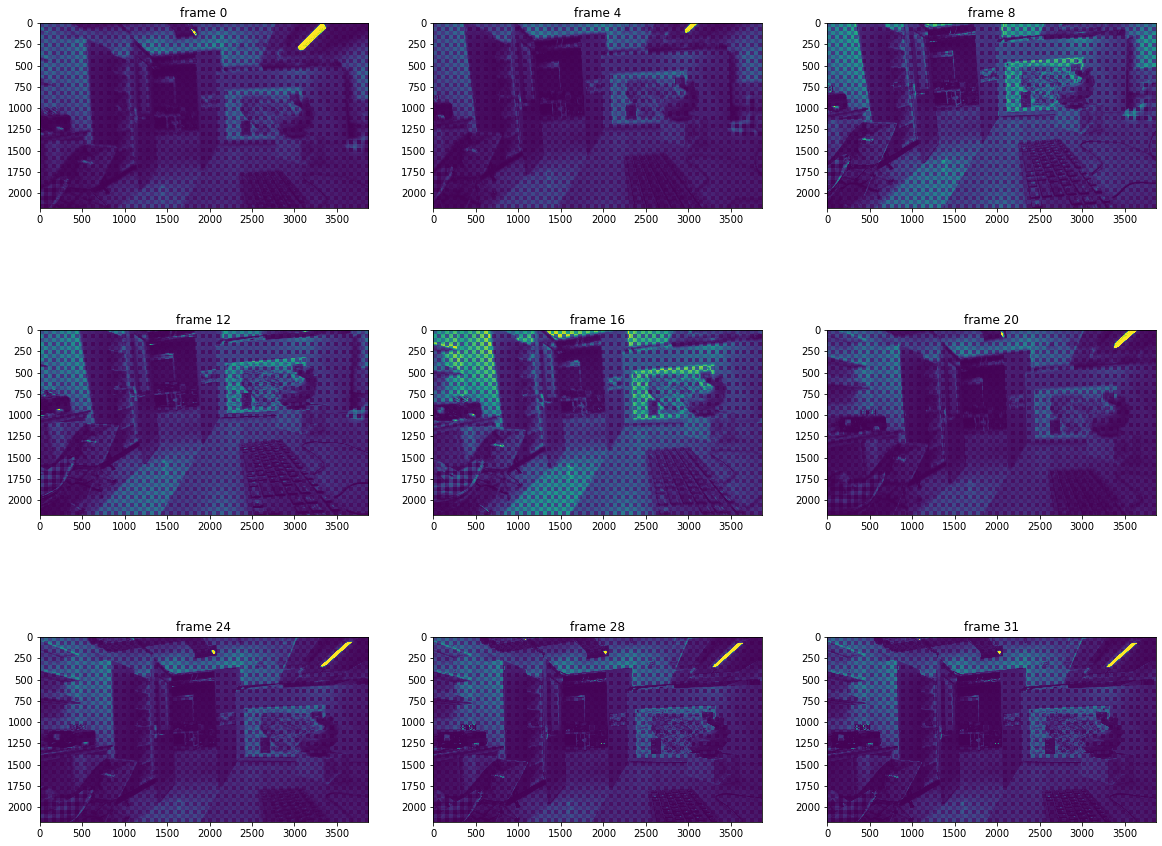

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(20, 16))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(rIm[min(i*12+j*4, n_frames-1)])
        ax[i][j].set_title("frame {}".format(min(i*12+j*4, n_frames-1)))
plt.show()

### radiance slices

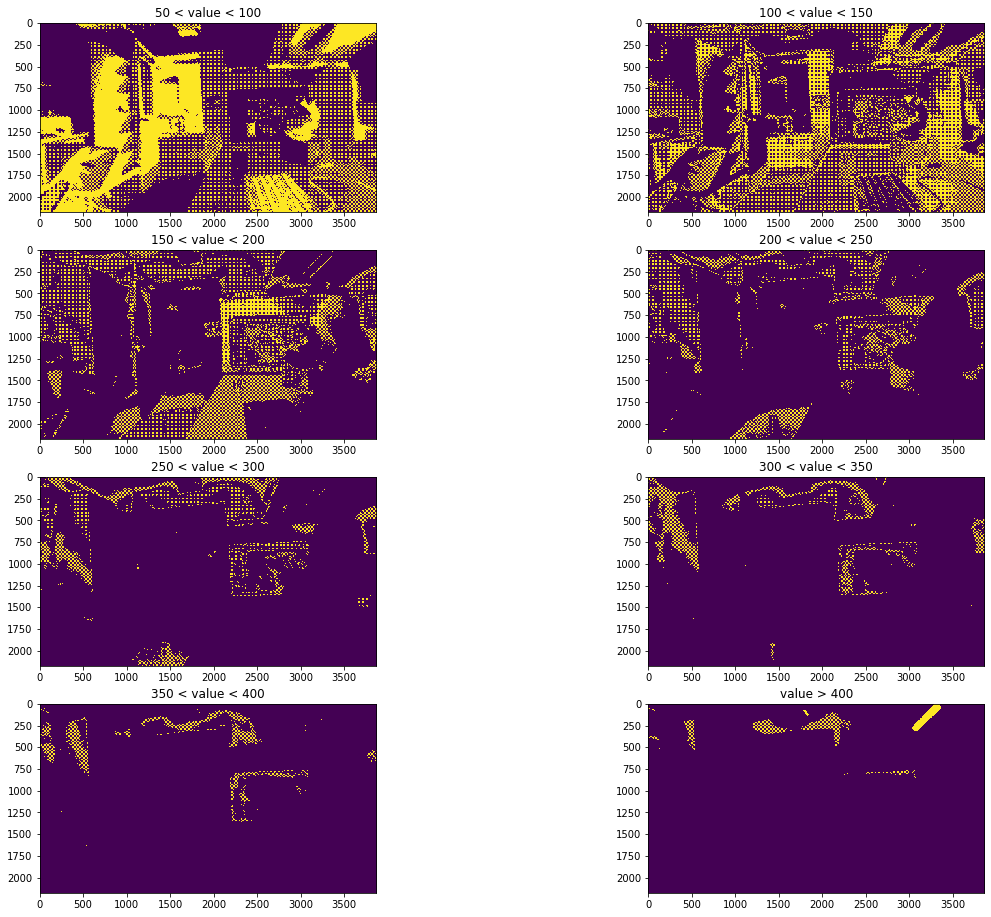

In [5]:
fig, ax = plt.subplots(4, 2, figsize=(20, 16))
for i in range(4):
    for j in range(2):
        ax[i][j].imshow((rIm[0] > i*100+j*50 + 50 )*(rIm[0] < i*100+j*50+100))
        ax[i][j].set_title("{} < value < {}".format(i*100+j*50+ 50, i*100+j*50+100))
ax[3][1].imshow(rIm[0] > 400) 
ax[3][1].set_title("value > 400")
plt.show()

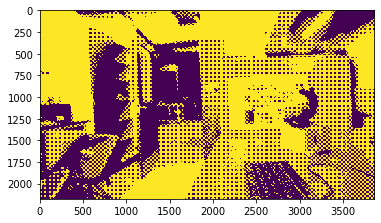

In [6]:
plt.imshow((rIm[0] > 100))
plt.show()

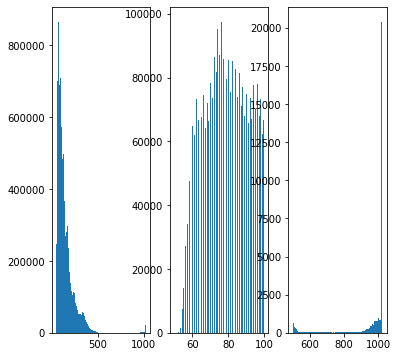

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(6, 6))
ax[0].hist(rIm[0].flatten(), bins = 100)
ax[1].hist(rIm[0].flatten(), bins = 100, range = (50, 100))
ax[2].hist(rIm[0].flatten(), bins = 100, range = (500, 1023))
plt.show()
# plt.boxplot(rIm[0].flatten())
# plt.show()

In [8]:
print_stat("rIm[0]", rIm[0])

rIm[0] shape:  (2174, 3864) dtype: int16
rIm[0] stat: max: 1023, min: 51, mean: 144.30579669670357, std: 94.66028749242327
